In [54]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#Importing Data
data = pd.read_csv('./FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


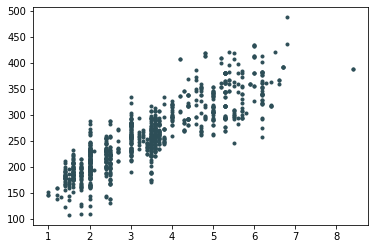

In [56]:
#Plotting the graph (ENGINESIZE v/s CO2EMISSIONS)
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, marker = ".", color = "#2d4e57")

In [57]:
#Now to start predicting, we need to fit the model
def fitSLR(X,y):
    #Preprocessing
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    data = pd.concat([X,y], axis=1)
    
    #Calculating mean for both Target and Feature Variable
    meanX = float(X.mean())
    meanY = float(y.mean())
    
    #Calculating `x-mean` and `y-mean` for each data point
    data['x-mean'] = X - meanX
    data['y-mean'] = y - meanY
    
    #Also calculating product(`x-mean, y-mean`) and square(x-mean)
    data['mul'] = data['x-mean'] * data['y-mean']
    data['sq'] = np.power(data['x-mean'], 2)
    
    #Summation of data['mul'] and data['sq']
    sumXY = data['mul'].sum()
    sumX = data['sq'].sum()
    
    #Calculating the coefficients or weights
    global b1, b0
    b1 = sumXY/sumX
    b0 = meanY - b1 * meanX
    
    #We will be returning the coefficients/weights from this function
    return b0, b1

In [58]:
fitSLR(data.ENGINESIZE, data.CO2EMISSIONS)

(125.30409949535718, 39.12519978671173)

In [59]:
#Now that we have fitted the data, we will now have to predict!
def predict(X):
    predList, y = [], []
    for i in range(0, len(X)):
        predList.append(X[i])
    for i in predList:
        itemY = b0 + b1 * i
        y.append(itemY)
    return y

In [61]:
#Let us predict on the first five elements of the dataset, usually there should be train-test-validation dataset,
#As this is just a demo, we will be predicting on the given dataset itself!
predict(data.ENGINESIZE.head())

[203.55449906878064,
 219.20457898346535,
 183.99189917542478,
 262.24229874884827,
 262.24229874884827]

In [64]:
#Let us see what is our original values for the same!
data.CO2EMISSIONS.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [67]:
#Predicting on the whole dataset
predList = predict(data.ENGINESIZE)

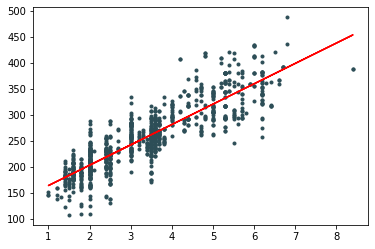

In [71]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, marker='.', color='#2d4e57') #Original Data
plt.plot(data.ENGINESIZE, predList, color='r') #Best Fit Line